In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
import nltk
import tensorflow as tf

In [3]:
a=pd.read_csv('amazon_reviews.csv')

In [4]:
data = a.drop(['itemName','verified','feature','reviewTime','summary'],axis=1)

In [5]:
data

,userName,description,image,brand,category,price,rating,reviewText,vote
0,Amazon Customer,"[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,Prime_Pantry,$1.63,5.0,super smooth and yummy with crunchy bits,0
1,Carla,"['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,Grocery_and_Gourmet_Food,$6.40,5.0,Perfect for kombucha,0
2,Jaclyn,"[""The Pet Champion Large/ Extra Large 22-36 in...",['https://images-na.ssl-images-amazon.com/imag...,Pet Champion,Pet_Supplies,$7.99,5.0,Finally a harness that fits my puppy. I really...,0
3,Christinne M,['Koh-I-Noor Progresso Woodless Colored 24-Pen...,['https://images-na.ssl-images-amazon.com/imag...,KOH-I-NOOR,Arts_Crafts_and_Sewing,$14.18,5.0,I LOVE THEM!! I bought them at Micheals our of...,0
4,Sandy,"[""Stunning craftsmanship based on a classic st...",['https://images-na.ssl-images-amazon.com/imag...,Parker,Office_Products,NaN,5.0,"I love this pen! I love the shape of it, the f...",0
...,...,...,...,...,...,...,...,...,...
551154,Greg,"['Iron Twist Chains, Platinum Color<P>Size: Ri...",['https://images-na.ssl-images-amazon.com/imag...,PH PandaHall,Arts_Crafts_and_Sewing,$8.29,2.0,Cheap price but weak chain.,0
551155,Gayle LaRue,"['Plenty of storage and comfortable seating, a...",['https://images-na.ssl-images-amazon.com/imag...,Keter,Patio_Lawn_and_Garden,$121.76,4.0,Great deck box,0
551156,Alfred D. Wallace,"[""The AcuRite remote battery pack plugs into t...",['https://images-na.ssl-images-amazon.com/imag...,AcuRite,Patio_Lawn_and_Garden,$19.95,5.0,Putting these in my weather station. I anticip...,0
551157,Dave Dunn Wilmer,['The extra-large outdoor entertainment statio...,['https://images-na.ssl-images-amazon.com/imag...,Keter,Patio_Lawn_and_Garden,$155.64,5.0,This is a nice quality grilling table where yo...,0


In [6]:
data.head()

,userName,description,image,brand,category,price,rating,reviewText,vote
0,Amazon Customer,"[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,Prime_Pantry,$1.63,5.0,super smooth and yummy with crunchy bits,0
1,Carla,"['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,Grocery_and_Gourmet_Food,$6.40,5.0,Perfect for kombucha,0
2,Jaclyn,"[""The Pet Champion Large/ Extra Large 22-36 in...",['https://images-na.ssl-images-amazon.com/imag...,Pet Champion,Pet_Supplies,$7.99,5.0,Finally a harness that fits my puppy. I really...,0
3,Christinne M,['Koh-I-Noor Progresso Woodless Colored 24-Pen...,['https://images-na.ssl-images-amazon.com/imag...,KOH-I-NOOR,Arts_Crafts_and_Sewing,$14.18,5.0,I LOVE THEM!! I bought them at Micheals our of...,0
4,Sandy,"[""Stunning craftsmanship based on a classic st...",['https://images-na.ssl-images-amazon.com/imag...,Parker,Office_Products,NaN,5.0,"I love this pen! I love the shape of it, the f...",0


In [7]:
data.tail()

,userName,description,image,brand,category,price,rating,reviewText,vote
551154,Greg,"['Iron Twist Chains, Platinum Color<P>Size: Ri...",['https://images-na.ssl-images-amazon.com/imag...,PH PandaHall,Arts_Crafts_and_Sewing,$8.29,2.0,Cheap price but weak chain.,0
551155,Gayle LaRue,"['Plenty of storage and comfortable seating, a...",['https://images-na.ssl-images-amazon.com/imag...,Keter,Patio_Lawn_and_Garden,$121.76,4.0,Great deck box,0
551156,Alfred D. Wallace,"[""The AcuRite remote battery pack plugs into t...",['https://images-na.ssl-images-amazon.com/imag...,AcuRite,Patio_Lawn_and_Garden,$19.95,5.0,Putting these in my weather station. I anticip...,0
551157,Dave Dunn Wilmer,['The extra-large outdoor entertainment statio...,['https://images-na.ssl-images-amazon.com/imag...,Keter,Patio_Lawn_and_Garden,$155.64,5.0,This is a nice quality grilling table where yo...,0
551158,Stacy A. Johnson,"['Pop-Tarts Frosted Strawberry, Frosted Bluebe...",['https://images-na.ssl-images-amazon.com/imag...,Pop-Tarts,Prime_Pantry,$3.69,5.0,This is a nice variety pack for the whole family.,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551159 entries, 0 to 551158
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userName     551098 non-null  object 
 1   description  551151 non-null  object 
 2   image        551159 non-null  object 
 3   brand        547290 non-null  object 
 4   category     551159 non-null  object 
 5   price        476825 non-null  object 
 6   rating       551159 non-null  float64
 7   reviewText   550764 non-null  object 
 8   vote         551159 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 37.8+ MB


In [9]:
data.describe()

,rating,vote
count,551159.000000,551159.000000
mean,4.345191,0.120183
std,1.170084,1.441491
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,418.000000


In [10]:
data.shape

(551159, 9)

In [11]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print()

userName
['Amazon Customer' 'Carla' 'Jaclyn' ... 'angel b' 'Leo W. Schunke Sr.'
 'Alfred D. Wallace']

description
['["Made from deliciously decadent ingredients, Toblerone\'s swiss milk chocolate is a delight for any chocolate lover. This special bar is packed with crunchy salted caramelized almonds along with Toblerone\'s unique honey and almond nougat. With their unique triangular shape, Toblerone chocolate bars are an ideal gift for any chocolate lover. Each bar is individually sealed to lock in fresh taste. This order contains one 3.52-ounce Toblerone Crunchy Salted Almond milk chocolate bar."]'
 "['Prince of Peace Enterprises, Inc., founded in 1983, earned its reputation as a leading and diversified company, specializing in the marketing, importing and distribution of gourmet products, beverages, dietary supplements, natural OTC topical analgesics (like world famous Tiger Balm), herbal products and teas; as well as product formulation, packaging and private labeling. Prince of Pe

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Dropout, GlobalMaxPooling1D
from nltk.corpus import stopwords
import pickle
import re

In [13]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z\s]', '', text)  
        text = ' '.join([word for word in text.split() if word.lower() not in stop_words])  
    else:
        text = ""  
    return text

In [16]:
data['cleaned_reviewText'] = data['reviewText'].apply(clean_text)

In [17]:
MAX_WORDS = 10000
MAX_LEN = 200
EMBEDDING_DIM = 100

In [18]:
text = re.sub(r'[^a-zA-Z\s]', '', 'text')
stop_words = set(stopwords.words('english'))
text = ' '.join([word for word in text.split() if word not in stop_words])

In [19]:
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(data['cleaned_reviewText'])
sequences = tokenizer.texts_to_sequences(data['cleaned_reviewText'])
x = pad_sequences(sequences, maxlen=MAX_LEN)

In [20]:
y = data['rating']
y = pd.get_dummies(y)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
model = tf.keras.Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Conv1D(64, 3, activation='relu'),  
    MaxPooling1D(pool_size=2),
    Conv1D(64, 3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

c:\Users\DELL\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, epochs=75, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/75
6890/6890 ━━━━━━━━━━━━━━━━━━━━ 323s 45ms/step - accuracy: 0.7158 - loss: 0.8141 - val_accuracy: 0.7435 - val_loss: 0.6964
Epoch 2/75
6890/6890 ━━━━━━━━━━━━━━━━━━━━ 318s 45ms/step - accuracy: 0.7505 - loss: 0.6746 - val_accuracy: 0.7481 - val_loss: 0.6840
Epoch 3/75
6890/6890 ━━━━━━━━━━━━━━━━━━━━ 338s 47ms/step - accuracy: 0.7668 - loss: 0.6261 - val_accuracy: 0.7473 - val_loss: 0.7113
Epoch 4/75
6890/6890 ━━━━━━━━━━━━━━━━━━━━ 310s 45ms/step - accuracy: 0.7849 - loss: 0.5722 - val_accuracy: 0.7517 - val_loss: 0.7142
Epoch 5/75
6890/6890 ━━━━━━━━━━━━━━━━━━━━ 287s 42ms/step - accuracy: 0.8036 - loss: 0.5244 - val_accuracy: 0.7500 - val_loss: 0.7467
Epoch 6/75
6890/6890 ━━━━━━━━━━━━━━━━━━━━ 297s 43ms/step - accuracy: 0.8219 - loss: 0.4803 - val_accuracy: 0.7506 - val_loss: 0.8038
Epoch 7/75
6890/6890 ━━━━━━━━━━━━━━━━━━━━ 302s 44ms/step - accuracy: 0.8352 - loss: 0.4450 - val_accuracy: 0.7478 - val_loss: 0.8497
Epoch 8/75
6890/6890 ━━━━━━━━━━━━━━━━━━━━ 304s 44ms/step - accuracy: 

In [25]:
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
print(f'Final Training Accuracy: {final_train_accuracy * 100:.2f}%')
print(f'Final Validation Accuracy: {final_val_accuracy * 100:.2f}%')

Final Training Accuracy: 94.31%
Final Validation Accuracy: 72.89%


In [26]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

y_train_pred = np.argmax(y_train_pred, axis=1)
y_test_pred = np.argmax(y_test_pred, axis=1)

y_train_true = np.argmax(y_train.values, axis=1)
y_test_true = np.argmax(y_test.values, axis=1)

13779/13779 ━━━━━━━━━━━━━━━━━━━━ 87s 6ms/step
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step


In [27]:
print("Training Accuracy:", accuracy_score(y_train_true, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test_true, y_test_pred))
print("Classification Report (Test Data):\n", classification_report(y_train_true, y_train_pred))
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_train_true, y_train_pred))
print("Classification Report (Test Data):\n", classification_report(y_test_true, y_test_pred))
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test_true, y_test_pred))

Training Accuracy: 0.9517062915176435
Test Accuracy: 0.7289171928296684
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.96      0.95      0.95     27179
           1       0.96      0.89      0.92     18661
           2       0.93      0.88      0.91     32569
           3       0.97      0.78      0.87     58653
           4       0.95      1.00      0.97    303865

    accuracy                           0.95    440927
   macro avg       0.95      0.90      0.92    440927
weighted avg       0.95      0.95      0.95    440927

Confusion Matrix (Test Data):
 [[ 25739    243    404      7    786]
 [   573  16577    847     41    623]
 [   215    413  28676    776   2489]
 [    25      3    661  45828  12136]
 [   188     11    198    655 302813]]
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.53      0.53      0.53      6842
           1       0.36      0.32   

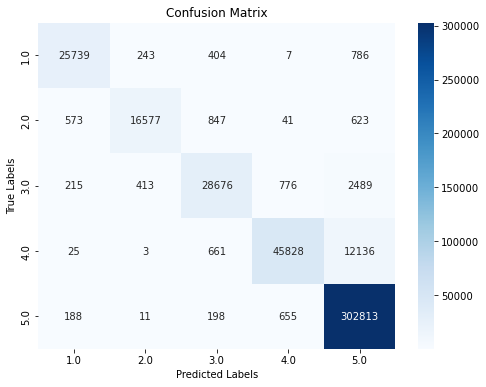

In [28]:
import seaborn as sns
cm = confusion_matrix(y_train_true, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=y.columns, yticklabels=y.columns)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

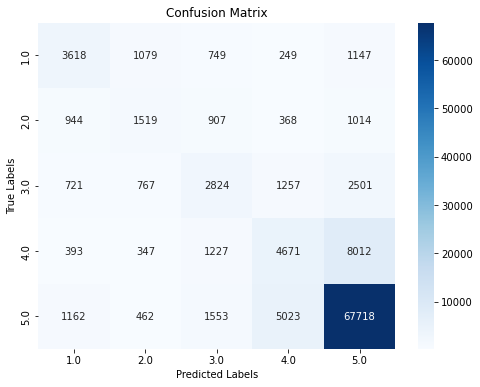

In [30]:
import seaborn as sns
cm = confusion_matrix(y_test_true, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=y.columns, yticklabels=y.columns)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [29]:
model.save('Reviews.h5')